In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics, datasets
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
from tqdm import tqdm
import seaborn as sns
import os
import cv2
from tqdm import tqdm

In [2]:
train_path = r"C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\ANN_Image\gender_eye\data\train"
test_path = r"C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\ANN_Image\gender_eye\data\test"
CATEGORIES = ["femaleeyes", "maleeyes"]

In [3]:
#import splitfolders
#indata = r"C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\ANN_Image\gender_eye\dataset"
#outdata = r"C:\Users\BlackFlameSG\Documents\Python Scripts\ML\Project\ANN_Image\gender_eye\data"
#splitfolders.ratio(indata, output=outdata, seed=1337, ratio=(.8, 0.2))

In [4]:
IMG_SIZE = 32

In [5]:
def create_data(DATADIR):
    image_dir = Path(DATADIR)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in tqdm(direc.iterdir()):
            img = imread(file)
            img_resized = resize(img, (IMG_SIZE,IMG_SIZE), anti_aliasing=True)
            img_gray = rgb2gray(img_resized)
            flat_data.append(img_gray.flatten()) 
            images.append(img_gray)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                target=target,
                images=images)

In [6]:
train_data = create_data(train_path)
test_data = create_data(test_path)

4161it [01:10, 59.31it/s]
5058it [01:38, 51.20it/s]
1041it [00:16, 62.26it/s]
1265it [00:25, 50.14it/s]


In [7]:
print(len(train_data.data))
print(len(test_data.data))

9219
2306


In [8]:
X_train, X_test, y_train, y_test = train_data.data, test_data.data, train_data.target, test_data.target

In [9]:
clf = svm.SVC(kernel='poly', C=1)
clf.fit(X_train, y_train)

SVC(C=1, kernel='poly')

In [10]:
clf.score(X_test,y_test)

0.8720728534258456

In [11]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [12]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average="macro"))

Accuracy: 0.8720728534258456
Precision: 0.8734168926414396


In [13]:
# Model Recall: what percentage of positive tuples are labelled as such?
recall_average = recall_score(y_test,y_pred, average="micro")
print("Recall:",recall_average)

Recall: 0.8720728534258456


In [14]:
#confusion matrix
import pandas as pd
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(conf_matrix, index=CATEGORIES, columns=CATEGORIES)

<AxesSubplot:>

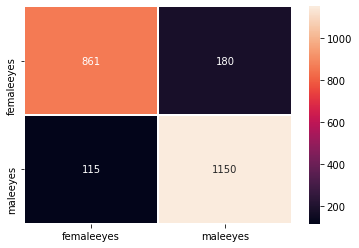

In [15]:
sns.heatmap(conf_matrix, annot=True, linewidths=1, fmt='g')

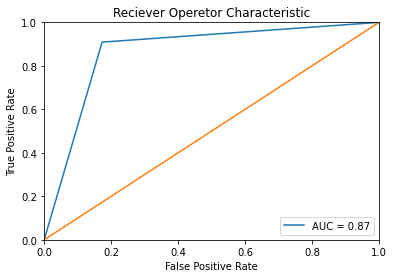

In [16]:
#roc_auc_score

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred) #fpr = False Positive Rate, tpr = True Positive Rate
roc_auc = metrics.auc(fpr, tpr)

plt.title('Reciever Operetor Characteristic')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1])
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()